# Simple K-means

In [154]:
import numpy as np
import matplotlib.pyplot as plt

In [155]:
def initialize_centroids(X, k):
    """
    Randomly initialize k centroids from the dataset X.
    """
    centroids = X.copy()
    np.random.shuffle(centroids)
    return centroids[:k]


def compute_distance(X, centroids):
    """
    Compute the distance between each data point and each centroid.
    """
    return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)


def assign_clusters(X, centroids):
    """
    Assign each point to the nearest centroid.
    """
    distances = compute_distance(X, centroids)
    return np.argmin(distances, axis=1)


def update_centroids(X, labels, k):
    """
    Update centroids as the mean of points assigned to each cluster.
    """
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points_in_cluster = X[labels == i]
        if points_in_cluster.size:
            new_centroids[i] = points_in_cluster.mean(axis=0)
    return new_centroids


def has_converged(old_centroids, centroids, tol=1e-4):
    """
    Check if the algorithm has converged by comparing old and new centroids.
    """
    return np.linalg.norm(centroids - old_centroids) < tol


def kmeans(X, k, max_iters=100):
    """
    K-Means clustering algorithm.
    """
    # Step 1: Initialize centroids randomly
    centroids = initialize_centroids(X, k)

    for _ in range(max_iters):
        # Step 2: Assign clusters
        labels = assign_clusters(X, centroids)

        # Step 3: Update centroids
        new_centroids = update_centroids(X, labels, k)

        # Step 4: Check for convergence
        if has_converged(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

In [156]:
# Create a simple dataset
np.random.seed(42)
X = np.vstack(
    (
        np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2)),
        np.random.normal(loc=[-2, -2], scale=0.5, size=(50, 2)),
        np.random.normal(loc=[2, -2], scale=0.5, size=(50, 2)),
    )
)
X.shape

(150, 2)

In [157]:
# Run K-Means with 3 clusters
k = 3
labels, centroids = kmeans(X, k)

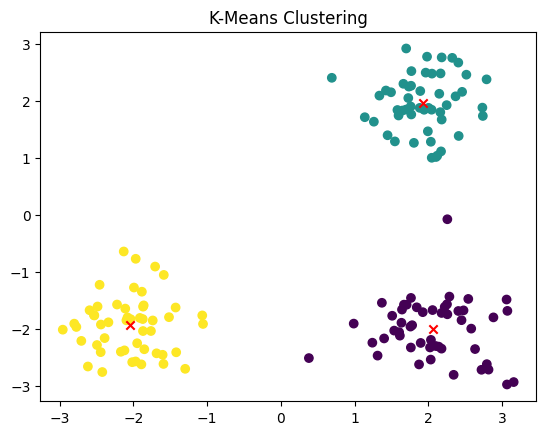

In [158]:
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], c="red", marker="x")
plt.title("K-Means Clustering")
plt.show()

# Pandas k-means

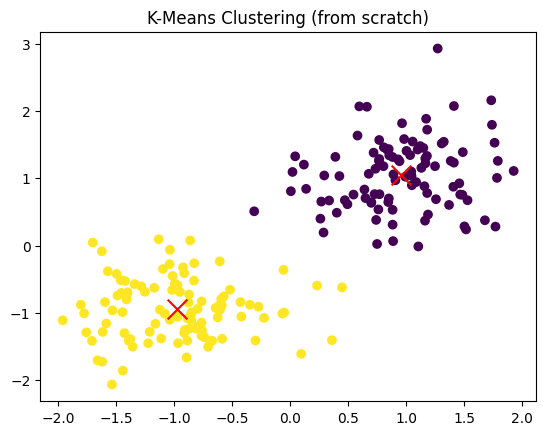

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Initialize K-Means parameters
def initialize_centroids(data, k):
    """Randomly initialize centroids by selecting k random points from the dataset."""
    centroids = data.sample(
        n=k
    ).to_numpy()  # Randomly select k rows as initial centroids
    return centroids


# Step 2: Assign points to the nearest centroid
def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.sqrt(((data.to_numpy()[:, np.newaxis] - centroids) ** 2).sum(axis=2))
    return np.argmin(distances, axis=1)  # Return the index of the nearest centroid


# Step 3: Update centroids by calculating the mean of points in each cluster
def update_centroids(data, labels, k):
    """Update centroid positions by taking the mean of the points assigned to each cluster."""
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids


# K-Means Clustering Algorithm
def kmeans(data, k, max_iters=100, tol=1e-4):
    """Perform K-Means clustering from scratch."""
    # Initialize centroids
    centroids = initialize_centroids(data, k)

    for _ in range(max_iters):
        old_centroids = centroids.copy()

        # Assign clusters
        labels = assign_clusters(data, centroids)

        # Update centroids
        centroids = update_centroids(data, labels, k)

        # Check for convergence (if centroids do not change much)
        if np.all(np.abs(centroids - old_centroids) < tol):
            break

    return centroids, labels


# Step 4: Test the K-Means implementation

# Example dataset: Create some simple 2D data points
np.random.seed(42)
data = pd.DataFrame(
    {
        "x": np.concatenate(
            [np.random.randn(100) * 0.5 + 1, np.random.randn(100) * 0.5 - 1]
        ),
        "y": np.concatenate(
            [np.random.randn(100) * 0.5 + 1, np.random.randn(100) * 0.5 - 1]
        ),
    }
)

# Perform K-Means clustering
k = 2
centroids, labels = kmeans(data, k)

# Plot the results
plt.scatter(data["x"], data["y"], c=labels, cmap="viridis")
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c="red", marker="x")
plt.title("K-Means Clustering (from scratch)")
plt.show()

# Polars k-means

In [130]:
import polars as pl

# Example dataset: Create some simple 2D data points
np.random.seed(42)
data = pd.DataFrame(
    {
        "x": np.concatenate(
            [np.random.randn(100) * 0.5 + 1, np.random.randn(100) * 0.5 - 1]
        ),
        "y": np.concatenate(
            [np.random.randn(100) * 0.5 + 1, np.random.randn(100) * 0.5 - 1]
        ),
    }
)

data = pl.DataFrame(data)
data = data.with_row_index()
data = data.rename({"index": "point_id"})
data

point_id,x,y
u32,f64,f64
0,1.248357,1.178894
1,0.930868,1.280392
2,1.323844,1.541526
3,1.761515,1.526901
4,0.882923,0.311165
…,…,…
195,-0.807341,-1.234588
196,-1.441929,-1.856567
197,-0.923137,-0.323064


In [141]:
# Function to initialize K-Means centroids
def initialize_centroids(data, k):
    # Randomly sample k points
    centroids = data.sample(k)
    centroids = centroids.drop("point_id")

    # create id column
    centroids = centroids.with_row_index()
    centroids = centroids.rename({"index": "centroid"})
    return centroids


# Function to assign points to the nearest centroid
def assign_nearest_centroid(data, centroids):
    # Cross-join data with centroids to calculate distances
    dist_matrix = data.join(centroids, how="cross")

    # Calculate the distance between each point and centroid
    distance_expr = sum(
        (
            (pl.col(col + "_right") - pl.col(col)) ** 2
            for col in data.columns
            if col not in ["point_id", "centroid"]
        )
    ).sqrt()

    dist_matrix = dist_matrix.with_columns(distance_expr.alias("distance"))

    # Rank distances to assign the nearest centroid
    dist_matrix = dist_matrix.with_columns(
        pl.col("distance").rank("dense").over("point_id").alias("distance_rank")
    )

    # Filter to select the nearest centroid for each point
    df_nearest_centroid = dist_matrix.filter(pl.col("distance_rank") == 1)
    return df_nearest_centroid


# Function to update centroids based on the mean of assigned points
def update_centroids(df_nearest_centroid):
    new_centroids = df_nearest_centroid.group_by("centroid").agg(
        [
            pl.col("x").mean().alias("x_right"),
            pl.col("y").mean().alias("y_right"),
        ]
    )
    return new_centroids


# K-Means main loop
def kmeans(data, k, max_iters=100):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(data, k)

    for _ in range(max_iters):
        # Step 2: Assign points to the nearest centroid
        df_nearest_centroid = assign_nearest_centroid(data, centroids)

        # Step 3: Update centroids
        centroids = update_centroids(df_nearest_centroid)

    return centroids, df_nearest_centroid

In [150]:
# Set the number of clusters
k = 2

# Run K-Means
centroids, final_assignment = kmeans(data, k, max_iters=1000)

In [151]:
centroids

centroid,x_right,y_right
u32,f64,f64
1,-0.974633,-0.943353
0,0.95314,1.049146


In [152]:
final_assignment

point_id,x,y,centroid,x_right,y_right,distance,distance_rank
u32,f64,f64,u32,f64,f64,f64,u32
0,1.248357,1.178894,0,0.95314,1.049146,0.322471,1
1,0.930868,1.280392,0,0.95314,1.049146,0.232316,1
2,1.323844,1.541526,0,0.95314,1.049146,0.616327,1
3,1.761515,1.526901,0,0.95314,1.049146,0.939,1
4,0.882923,0.311165,0,0.95314,1.049146,0.741314,1
…,…,…,…,…,…,…,…
195,-0.807341,-1.234588,1,-0.974633,-0.943353,0.335864,1
196,-1.441929,-1.856567,1,-0.974633,-0.943353,1.025829,1
197,-0.923137,-0.323064,1,-0.974633,-0.943353,0.622423,1


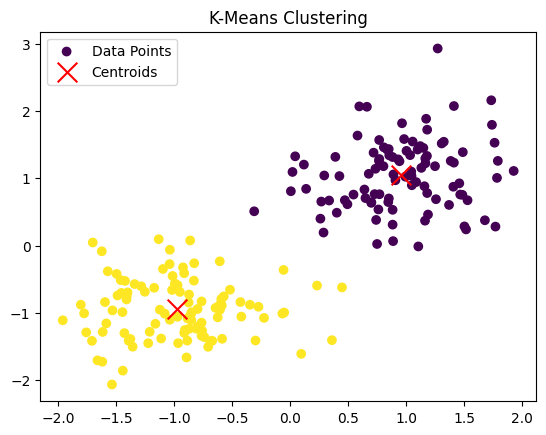

In [153]:
# Extract the points and labels (centroids) for plotting
points_x = final_assignment["x"].to_numpy()
points_y = final_assignment["y"].to_numpy()
labels = final_assignment["centroid"].to_numpy()

# Extract the centroids' new coordinates for plotting
centroids_x = centroids["x_right"].to_numpy()
centroids_y = centroids["y_right"].to_numpy()

# Plot the points, colored by their assigned centroid
plt.scatter(points_x, points_y, c=labels, cmap="viridis", label="Data Points")

# Plot the centroids as red "X" markers
plt.scatter(centroids_x, centroids_y, s=200, c="red", marker="x", label="Centroids")

# Add titles and legend
plt.title("K-Means Clustering")
plt.legend()

# Display the plot
plt.show()

# DuckDB k-means

In [22]:
import duckdb
import pandas as pd
import numpy as np

# Load your dataset (replace 'your_data.csv' with your dataset file)
n_sample = 100
data = pd.DataFrame(
    {
        "x": np.concatenate(
            [np.random.randn(n_sample) * 0.5 + 1, np.random.randn(n_sample) * 0.5 - 1]
        ),
        "y": np.concatenate(
            [np.random.randn(n_sample) * 0.5 + 1, np.random.randn(n_sample) * 0.5 - 1]
        ),
    }
)
data = data.reset_index(names=["point_id"])

# Connect to DuckDB
conn = duckdb.connect()

# Load data into DuckDB
conn.execute("CREATE OR REPLACE TABLE data AS SELECT * FROM data")


# Step 1: Initialize centroids
def initialize_centroids():
    conn.execute(
        f"""
    CREATE OR REPLACE TABLE centroids AS
    SELECT ROW_NUMBER() OVER() AS centroid, x, y
    FROM data
    ORDER BY RANDOM()
    LIMIT {k};
    """
    )


# Step 2: Assign points to the nearest centroid
def assign_nearest_centroid(columns=["x", "y"]):

    # Create SQL expression for computing the distance in multivariate space
    distance_expr = " + ".join(
        [f"POWER(centroids.{col} - data.{col}, 2)" for col in columns]
    )

    # Create distance matrix between points and centroids
    conn.execute(
        f"""
        CREATE OR REPLACE TABLE dist_matrix AS
        SELECT 
            data.point_id,
            centroids.centroid,
            SQRT({distance_expr}) AS distance
        FROM data
        CROSS JOIN centroids;
    """
    )

    # Assign nearest centroids
    conn.execute(
        """
    CREATE OR REPLACE TABLE nearest_centroids AS
    SELECT point_id, centroid, distance
    FROM (
        SELECT 
            point_id,
            centroid,
            distance,
            ROW_NUMBER() OVER(PARTITION BY point_id ORDER BY distance ASC) AS distance_rank
        FROM dist_matrix
    )
    WHERE distance_rank = 1;
    """
    )


# Step 3: Update centroids
def update_centroids():
    conn.execute(
        """
    CREATE OR REPLACE TABLE updated_centroids AS
    SELECT centroid, AVG(x) AS x_right, AVG(y) AS y_right
    FROM nearest_centroids
    JOIN data ON nearest_centroids.point_id = data.point_id
    GROUP BY centroid;
    """
    )

    # Replace centroids with updated centroids
    conn.execute(
        """
    CREATE OR REPLACE TABLE centroids AS
    SELECT centroid, x_right AS x, y_right AS y
    FROM updated_centroids;
    """
    )


# K-Means main loop
def kmeans(k, max_iters):
    # Initialize centroids
    initialize_centroids()

    for i in range(max_iters):
        # Assign points to the nearest centroid
        assign_nearest_centroid()

        # Update centroids
        update_centroids()

        print(f"Iteration {i+1} completed.")


# Parameters for K-Means
k = 2  # Number of centroids
max_iters = 100  # Maximum iterations

# Run K-Means
kmeans(k, max_iters)

Iteration 1 completed.
Iteration 2 completed.
Iteration 3 completed.
Iteration 4 completed.
Iteration 5 completed.
Iteration 6 completed.
Iteration 7 completed.
Iteration 8 completed.
Iteration 9 completed.
Iteration 10 completed.
Iteration 11 completed.
Iteration 12 completed.
Iteration 13 completed.
Iteration 14 completed.
Iteration 15 completed.
Iteration 16 completed.
Iteration 17 completed.
Iteration 18 completed.
Iteration 19 completed.
Iteration 20 completed.
Iteration 21 completed.
Iteration 22 completed.
Iteration 23 completed.
Iteration 24 completed.
Iteration 25 completed.
Iteration 26 completed.
Iteration 27 completed.
Iteration 28 completed.
Iteration 29 completed.
Iteration 30 completed.
Iteration 31 completed.
Iteration 32 completed.
Iteration 33 completed.
Iteration 34 completed.
Iteration 35 completed.
Iteration 36 completed.
Iteration 37 completed.
Iteration 38 completed.
Iteration 39 completed.
Iteration 40 completed.
Iteration 41 completed.
Iteration 42 completed.
I

In [23]:
# Fetch the final centroids and the assigned points
centroids = conn.execute("SELECT * FROM centroids").fetchdf()
centroids

,centroid,x,y
0,35,-0.916765,-1.142059
1,74,0.990233,1.084451


In [24]:
assigned_points = conn.execute(
    """
SELECT data.point_id, data.x, data.y, nearest_centroids.centroid
FROM data
JOIN nearest_centroids ON data.point_id = nearest_centroids.point_id;
"""
).fetchdf()

assigned_points

,point_id,x,y,centroid
0,0,1.021328,1.066984,74
1,1,0.505019,1.402883,74
2,2,0.532736,1.183974,74
3,3,1.516041,1.059514,74
4,4,1.204223,0.589205,74
...,...,...,...,...
195,195,0.047095,-1.028590,35
196,196,-0.193892,-0.908714,35
197,197,-0.908124,-1.560426,35
198,198,-0.846389,-0.682887,35


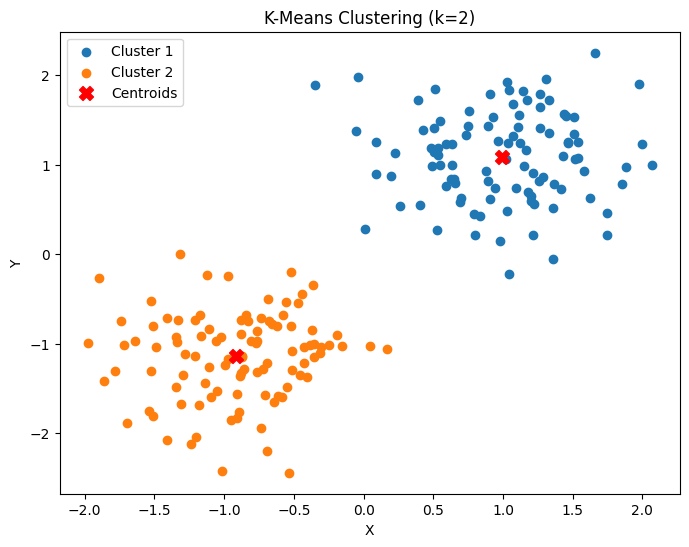

In [25]:
import matplotlib.pyplot as plt


# Plot the clusters and centroids
def plot_clusters(assigned_points, centroids):
    plt.figure(figsize=(8, 6))

    # Plot points with their assigned centroid colors
    for i, centroid_id in enumerate(assigned_points["centroid"].unique()):
        cluster_points = assigned_points[assigned_points["centroid"] == centroid_id]
        plt.scatter(cluster_points["x"], cluster_points["y"], label=f"Cluster {i+1}")

    # Plot centroids
    plt.scatter(
        centroids["x"],
        centroids["y"],
        color="red",
        marker="X",
        s=100,
        label="Centroids",
    )

    plt.title(f"K-Means Clustering (k={k})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()


# Plot the result
plot_clusters(assigned_points, centroids)